In [266]:
###############################################################################
# Date:        Nov. 6st 2019
# Name:      Peiying Lyu 
#ID:              8109407016
# Course:    INF 552, HW6
################################################################################

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## a. download data.  first 20% as test set

In [18]:
import numpy as np
import pandas as pd

full_df = pd.read_csv('D:/552 Machine Learning for Data Science/homework/Homework6/wdbc.data', header=None)
Header = ['ID', 'Diagnosis']
tmp_10 = ['radius','texture','perimeter','area','smoothness','compactness','concavity',
                     'concave_points','symmetry','fractal_dimension']
tmp_3 = ['_mean','_se','_worst']
Header_30 = []
for i in tmp_3:
#     print(i)
    for j in tmp_10:
        tmp_h = j+i
        Header.append(tmp_h)
        Header_30.append(tmp_h)
full_df.columns = Header


In [22]:
full_df

ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

In [23]:
M_df = pd.DataFrame(columns = Header)
B_df = pd.DataFrame(columns = Header)
M_line = []
B_line = []
for i in range(full_df.shape[0]):
    if full_df["Diagnosis"][i] == "M":
        M_line.append(i)
        M_df= M_df.append(full_df.iloc[i])
    if full_df["Diagnosis"][i] == "B":
        B_line.append(i)
        B_df = B_df.append(full_df.iloc[i])

        
test_df = pd.DataFrame(columns = Header)
train_df = pd.DataFrame(columns = Header)
tmp_M = M_df
for i in range(int(len(M_line)*0.2)):
    test_df = test_df.append(M_df.iloc[i])
for i in range(int(len(B_line)*0.2)):
    test_df = test_df.append(B_df.iloc[i]) 
    
train_df = train_df.append(M_df.iloc[int(len(M_line)*0.2):])
train_df = train_df.append(B_df.iloc[int(len(B_line)*0.2):])

test_df

ID Diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
..         ...       ...          ...           ...             ...   
109     864018         B       11.340         21.26           72.48   
110     864033         B        9.777         16.99           62.50   
111      86408         B       12.630         20.76           82.15   
112      86409         B       14.260         19.65           97.83   
113     864292         B       10.510         20.19           68.64   
114     864496         B        8.726         15.83           55.84   
115     864685         B       11.930         21.53           76.53   
116     864726         B        8.950         15.76           58.74   
120     865137         B       11.410         10.82           73.34   
123     865432         B       14.500         10.89           94.28   
124     865468         B       13.370         16.39           86.10   
125      86561         B       13.850         17.21           88.44   
128     866458         B       15.100         16.39           99.58   
130     866714         B       12.190         13.29           79.08   
133     867387         B       15.710         13.93          102.00   
136     868223         B       11.710         16.67           74.72   
137     868682         B       11.430         15.39           73.06   
139     868871         B       11.280         13.39           73.00   
140     868999         B        9.738         11.97           61.24   
142     869218         B       11.430         17.31           73.66   
143     869224         B       12.900         15.92           83.74   
144     869254         B       10.750         14.97           68.26   
145     869476         B       11.900         14.65           78.11   
147   86973701         B       14.950         18.77           97.84   
148   86973702         B       14.44

In [24]:
train_df 

ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
47      85715         M       13.170         18.66           85.98      534.6   
53     857392         M       18.220         18.70          120.30     1033.0   
54     857438         M       15.100         22.02           97.26      712.8   
56     857637         M       19.210         18.57          125.50     1152.0   
57     857793         M       14.710         21.59           95.55      656.9   
62     858986         M       14.250         22.15           96.42      645.7   
64   85922302         M       12.680         23.84           82.69      499.0   
65     859283         M       14.780         23.94           97.40      668.3   
70     859575         M       18.940         21.31          123.60     1130.0   
72     859717         M       17.200         24.52          114.20      929.4   
73     859983         M       13.800         15.79           90.43      584.1   
75    8610404         M       16.070         19.65          104.10      817.7   
77    8610637         M       18.050         16.15          120.20     1006.0   
78    8610862         M       20.180         23.97          143.70     1245.0   
82    8611555         M       25.220         24.91          171.50     1878.0   
83    8611792         M       19.100         26.29          129.10     1132.0   
85    8612399         M       18.460         18.52          121.10     1075.0   
86   86135501         M       14.480         21.46           94.25      648.2   
87   86135502         M       19.020         24.59          122.00     1076.0   
91     861799         M       15.370         22.76          100.20      728.2   
94     862028         M       15.060         19.83          100.30      705.6   
95      86208         M       20.260         23.03          132.40     1264.0   
99     862548         M       14.420         19.77           94.48      642.5   
100    862717         M       13.610         24.98           88.05      582.7   
105    863030         M       13.110         15.56           87.21      530.2   
108     86355         M       22.270         19.67          152.80     1509.0   
117    864729         M       14.870         16.67           98.64      682.5   
118    864877         M       15.780         22.91          105.70      782.6   
119    865128         M       17.950         20.01          114.20      982.0   
121     86517         M       18.660         17.12          121.40     1077.0   
..        ...       ...          ...           ...             ...        ...   
530     91858         B       11.750         17.56           75.89      422.9   
531  91903901         B       11.670         20.02           75.21      416.2   
532  91903902         B       13.680         16.33           87.76      575.5   
534    919537         B       10.960         17.62           70.79      365.6   
537    919812         B       11.690         24.44           76.37      406.4   
538    921092         B        7.729         25.49           47.98      178.8   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860      

## b Monte-Carlo Simulation: M=30 times. 

In [26]:
from sklearn.model_selection import train_test_split

df = full_df.drop(columns="ID")
# 1 - Benign 0 - Malignant
df['Diagnosis'] = df['Diagnosis'].replace(['B'], '1')
df['Diagnosis'] = df['Diagnosis'].replace(['M'], '0')

X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train,X_test, y_train, y_test = train_test_split(  X, y,
                                                                                       test_size = 0.2, 
                                                                                       stratify= y,
                                                                                       random_state=0)
# X

### i  Supervised Learning: L1-svm with 5-fold with normalized data



In [27]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

def find_report(true, pred, X_,model):
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred, average='weighted')
    recall = recall_score(true, pred, average='weighted')
    f1 = f1_score(true, pred, average='weighted')
    
    
    probs = model.decision_function(X_)
    true = list(map(int, true))
    fpr, tpr, threshold = metrics.roc_curve(true, probs, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    
    return (accuracy, precision, recall, f1, roc_auc)

def draw_roc(true, pred, X_,model):
    probs = model.decision_function(X_)
    fpr, tpr, _ = metrics.roc_curve(true, probs)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    cm = confusion_matrix(true, pred)
    print(cm)
    plot_confusion_matrix(cm)
    plt.show()

30th training data


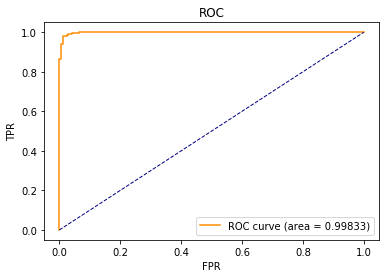

[[165   5]
 [  4 281]]


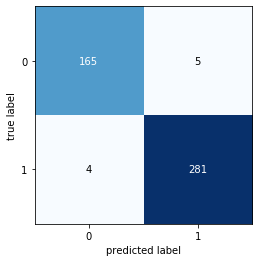

30th testing data


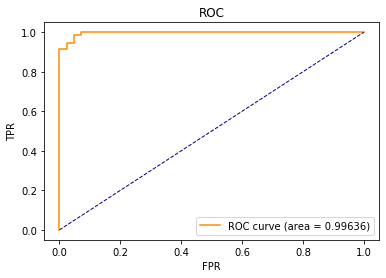

[[40  2]
 [ 2 70]]


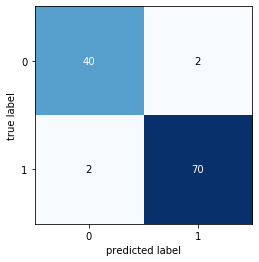

for train data: 
accuracy_score:  0.9802197802197802
precision_score:  0.9802061843481965
recall_score: 0.9802197802197802
f1_score: 0.9802079265371428
auc_score: 0.9982999656002751

for test data: 
accuracy_score:  0.9649122807017542
precision_score:  0.9649122807017542
recall_score: 0.9649122807017542
f1_score: 0.9649122807017542
auc_score: 0.9963624338624338


In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

acc_te = []
prec_te = []
recall_te = []
f1_te = []
auc_te = []

acc_tr = []
prec_tr = []
recall_tr = []
f1_tr = []
auc_tr = []


for i in range(0,30):
    #---------------------------------------------------------------------------
    X_train,X_test, y_train, y_test = train_test_split(X, y,
                                                                                       test_size = 0.2, 
                                                                                       stratify= y,
                                                                                       random_state=0)
    y_train = list(map(int, y_train))
    y_test = list(map(int, y_test))
    X_train_nor = preprocessing.normalize(X_train)
    X_test_nor = preprocessing.normalize(X_test)
    
    #-------------------------------------------------------------------------------
    c_range = np.logspace(-3, 6, num=10)
    param_grid = dict(C=c_range)
    
    l1_svm = GridSearchCV(LinearSVC(penalty='l1', dual=False),
                                                  cv = 5,
                                                  param_grid=param_grid, 
                                                  scoring='accuracy').fit(X_train_nor, y_train)
    
    tr_pred = l1_svm.predict(X_train_nor)
    te_pred = l1_svm.predict(X_test_nor)

    #--------------train ---------------
    acc, prec, recall, f1, auc = find_report(y_train, tr_pred, X_train_nor, l1_svm)
    acc_tr.append(acc)
    prec_tr.append(prec)
    recall_tr.append(recall)
    f1_tr.append(f1)
    auc_tr.append(auc)
    
    if i == 29:
        print("30th training data")
        draw_roc(y_train, tr_pred, X_train_nor,l1_svm)
    
    #--------------test --------------
    acc1, prec1, recall1, f11, auc1 = find_report(y_test, te_pred, X_test_nor, l1_svm)
    acc_te.append(acc1)
    prec_te.append(prec1)
    recall_te.append(recall1)
    f1_te.append(f11)
    auc_te.append(auc1)

    if i == 29:
        print("30th testing data")
        draw_roc(y_test, te_pred, X_test_nor,l1_svm)
        
#----------------------report----------------------------------------------
print("for train data: ")
print("accuracy_score: ", np.mean(acc_tr))
print("precision_score: ", np.mean(prec_tr))
print("recall_score:", np.mean(recall_tr))
print("f1_score:", np.mean(f1_tr))
print("auc_score:", np.mean(auc_tr))

print("\nfor test data: ")
print("accuracy_score: ", np.mean(acc_te))
print("precision_score: ", np.mean(prec_te))
print("recall_score:", np.mean(recall_te))
print("f1_score:", np.mean(f1_te))
print("auc_score:", np.mean(auc_te))


### ii Semi-Supervised Learning/ Self-training: 50% pos 50%neg as labelled data. The rest is unlabelled. 

In [29]:
def random_50(X, y):
    lab_X = pd.DataFrame()
    lab_y = pd.DataFrame()
    unlab_X = pd.DataFrame()
    unlab_y = pd.DataFrame()
    
    X_train,X_test, y_train, y_test = train_test_split( X, y,
                                                                                       test_size = 0.2, 
                                                                                       stratify= y,
                                                                                       random_state=0)
    train_data = X_train
    train_data['Diagnosis'] = y_train
    
    gb = train_data.groupby('Diagnosis')
    a = [gb.get_group(x) for x in gb.groups]
    pos = a[1]
    neg = a[0]
    
    pos_lab = pos[:int(len(pos)//2)]
    neg_lab = neg[:int(len(neg)//2)]

    pos_unlab = pos[int(len(pos)//2):]
    neg_unlab = neg[int(len(neg)//2):]
    
    
    lab = pos_lab.append(neg_lab, ignore_index=True)
    unlab = pos_unlab.append(neg_unlab, ignore_index=True)
    
    lab_y['Diagnosis'] = lab["Diagnosis"]
    lab_X = lab.drop(['Diagnosis'],axis = 1)
    
    unlab_y['Diagnosis'] = unlab["Diagnosis"]
    unlab_X = unlab.drop(['Diagnosis'],axis = 1)

    return (lab_X, lab_y, unlab_X, unlab_y, X_test, y_test)

#### A.  L1 with SVM with 5-fold

for train data: 
accuracy_score:  0.9893772893772894
precision_score:  0.9894082413313185
recall_score: 0.9893772893772894
f1_score: 0.9893874275432168
auc_score: 0.999409020684276


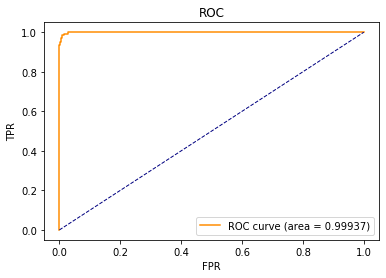

[[310   3]
 [  2 140]]


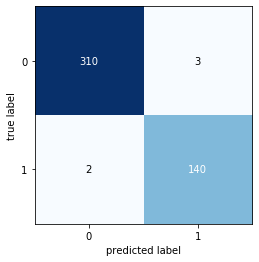


for test data: 
accuracy_score:  0.9374269005847949
precision_score:  0.9396016611577256
recall_score: 0.9374269005847949
f1_score: 0.9378400758560621
auc_score: 0.9890432098765433
<class 'numpy.ndarray'>


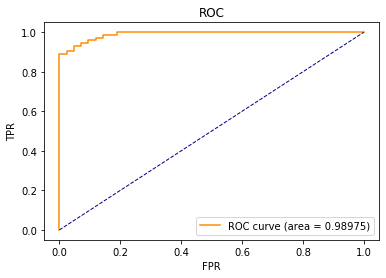

[[40  2]
 [ 5 67]]


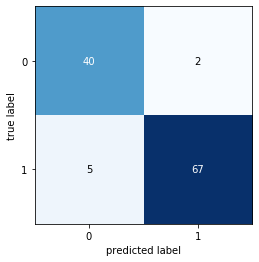

In [31]:
from sklearn.model_selection import train_test_split

df = full_df.drop(columns="ID")
# 1 - Benign 0 - Malignant
df['Diagnosis'] = df['Diagnosis'].replace(['B'], '1')
df['Diagnosis'] = df['Diagnosis'].replace(['M'], '0')

X = df.iloc[:,1:]
y = df.iloc[:,0]

acc_tr = []
prec_tr = []
recall_tr = []
f1_tr = []
auc_tr = []

acc_te = []
prec_te = []
recall_te = []
f1_te = []
auc_te = []

for i in range(0,30):
    X = pd.DataFrame(preprocessing.normalize(X), columns=Header_30)
#     X = preprocessing.normalize(X)
    
    lab_X, lab_y, unlab_X, unlab_y, X_test, y_test = random_50(X,y)

    
    #-----------------  l1-svm- model  ---------------------------------------------------
    c_range = np.logspace(-3, 6, num=10)
    param_grid = dict(C=c_range)

    l1_svm = GridSearchCV(LinearSVC(penalty='l1', dual=False),
                                                      cv = 5,
                                                      param_grid=param_grid, 
                                                      scoring='accuracy').fit(lab_X, lab_y)

    #---------------- choose the best C --------------------
    best_c = l1_svm.best_params_
    new_l1_svm = LinearSVC(penalty='l1', dual=False, C=best_c['C']).fit(lab_X, lab_y)
    
    #---------------- refit model ------------------
    for i in range(len(unlab_X)):
        tmp_X = pd.DataFrame(columns = Header_30)
        tmp_y = pd.DataFrame(columns=['Diagnosis'])
        tmp_largest= pd.DataFrame()

        tmp_largest = pd.DataFrame(new_l1_svm.decision_function(unlab_X)).abs().sort_values(by = [0],ascending = False)
        tmp_index = tmp_largest.iloc[0,:].name
        tmp_X.loc[tmp_index] = unlab_X.iloc[tmp_index]
        lab_X = lab_X.append(tmp_X)
        tmp_y.loc[tmp_index] = new_l1_svm.predict(tmp_X)
        lab_y = lab_y.append(tmp_y)
        new_l1_svm.fit(lab_X, lab_y)

    #--------------------- train data report -------------------------
    tr_pred = new_l1_svm.predict(lab_X)
    acc, prec, recall,  f1, auc = find_report(lab_y.values, tr_pred, lab_X, new_l1_svm)
    
    acc_tr.append(acc)
    prec_tr.append(prec)
    recall_tr.append(recall)
    f1_tr.append(f1)
    auc_tr.append(auc)
        
    # ------------------------test data report-------------------------
    te_pred_ = new_l1_svm.predict(X_test)
    acc_, prec_, recall_, f1_, auc_ = find_report(y_test, te_pred_, X_test, new_l1_svm)

    acc_te.append(acc_)
    prec_te.append(prec_)
    recall_te.append(recall_)
    f1_te.append(f1_)
    auc_te.append(auc_)
    
    
#---------------- report ----------------------------------------------
# print(auc_te)
print("for train data: ")
print("accuracy_score: ", np.mean(acc_tr))
print("precision_score: ", np.mean(prec_tr))
print("recall_score:", np.mean(recall_tr))
print("f1_score:", np.mean(f1_tr))
print("auc_score:", np.mean(auc_tr))
tmp_y = lab_y.values
tmp_y = list(map(int, tmp_y))
tr_pred = list(map(int, tr_pred))
draw_roc(tmp_y, tr_pred, lab_X, new_l1_svm)

print("\nfor test data: ")
print("accuracy_score: ", np.mean(acc_te))
print("precision_score: ", np.mean(prec_te))
print("recall_score:", np.mean(recall_te))
print("f1_score:", np.mean(f1_te))
print("auc_score:", np.mean(auc_te))
y_test = list(map(int, y_test))
print(type(te_pred_))
te_pred_ = list(map(int, te_pred_))

draw_roc(y_test, te_pred_, X_test, new_l1_svm)

### iii  Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and  k = 2.

How do you make sure that the algorithm was not trapped in a local minimum?
#### Ans: I repeated the algorithm for several times.

In [198]:
from sklearn.metrics import roc_curve, auc,  confusion_matrix
from sklearn.metrics import roc_auc_score

def kmean_report(pred,true,data,model):
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred, average='weighted')
    recall = recall_score(true, pred, average='weighted')
    f1 = f1_score(true, pred, average='weighted')
    auc_ = roc_auc_score(true, pd.DataFrame(kmean.transform(data)).iloc[:,0])
    
    return (accuracy, precision, recall, f1, auc_)

def kmean_draw(pred,true,data,model):
    fpr, tpr, thresholds = roc_curve(true, pred)
    roc_auc = auc(fpr, tpr)
#     print(tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    

----- 0  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 1  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 2  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 3  -----
cluster 1 mode: 1
cluster 2 mode: 0
0    353
1    102
Name: labels, dtype: int64
----- 4  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 5  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 6  -----
cluster 1 mode: 1
cluster 2 mode: 0
0    353
1    102
Name: labels, dtype: int64
----- 7  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 8  -----
cluster 1 mode: 1
cluster 2 mode: 1
1    353
0    102
Name: labels, dtype: int64
----- 9  -----
cluster 1 mode: 1
cluster 2 mode: 0
0    353
1    102
Name: labels, dtype: int64
----- 10  -----
cluster 1 mode: 1
cluste

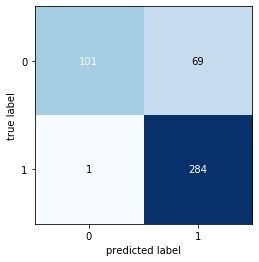

 **********  ROC for 30th randomly train_data *********


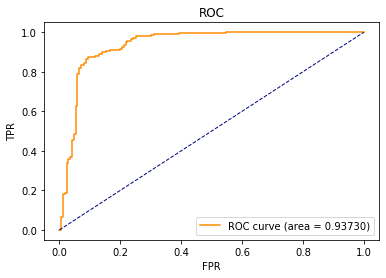

In [204]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

df = full_df.drop(columns="ID")
# 1 - Benign 0 - Malignant
df['Diagnosis'] = df['Diagnosis'].replace(['B'], '1')
df['Diagnosis'] = df['Diagnosis'].replace(['M'], '0')

X = df.iloc[:,1:]
y = df.iloc[:,0]

acc_tr = []
prec_tr = []
recall_tr = []
f1_tr = []
auc_tr = []

acc_te = []
prec_te = []
recall_te = []
f1_te = []
auc_te = []

for i in range(30):
    print("-----", i," -----")
    X_train,X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, 
                                                                                            stratify= y, random_state = 0)
    y_true = y_train
    training_x = X_train
    for i in range(10):
        kmean = KMeans(n_clusters=2, n_init=30).fit(training_x)
    cluster_labels = kmean.labels_
#     print(kmean.cluster_centers_)

    #-------------------  TRAIN DATA -------------------------------------
    c_1 = list()
    c_2 = list()
    for i in range(30):
        closest = 0
        closest, _ = pairwise_distances_argmin_min(kmean.cluster_centers_, training_x)
#         print(closest)
        c_1.append(closest[0])
        c_2.append(closest[1])
        if i is not 29:
            training_x = training_x.drop(training_x.index[closest[0]])
            training_x = training_x.drop(training_x.index[closest[1]])

    #Majority Poll
    center1 = y_train.iloc[c_1]
    print("cluster 1 mode:", center1.mode()[0])
    center2 = y_train.iloc[c_2]
    print("cluster 2 mode:", center2.mode()[0])

    tmp_ = X_train
    cluster_ = pd.concat([tmp_, y_true], axis=1)
    labs =cluster_labels.tolist()
    labs = pd.DataFrame(labs, columns=['labels'])

    cluster_['labels'] = labs.values
    print(cluster_['labels'].value_counts())
    mode1 = center1.mode()[0]
    mode2 = center2.mode()[0]
    cluster_['y_pred'] = cluster_.labels.apply(lambda x:  mode1 if x == 0 else mode2 )     

    # ------------------------- REPORT TRAIN --------------------------------
    y_pred = cluster_.iloc[:,-1]
    y_true = cluster_.iloc[:,-3]
    y_pred = list(map(int, y_pred))
    y_true = list(map(int, y_true))
    acc, prec, recall, f1, auc = kmean_report( y_pred,y_true, X_train, kmean)
    
    acc_tr.append(acc)
    prec_tr.append(prec)
    recall_tr.append(recall)
    f1_tr.append(f1)
   
 #     train_auc = roc_auc_score(y_true, pd.DataFrame(kmean.transform(X_train)).iloc[:,0])
    auc_tr.append(auc)
#     print(train_auc)
    
    # ------------------------ TEST -------------------------------------------
    y_test = list(map(int, y_test))
    y_test_pred = kmean.predict(X_test)
#     print(y_test_pred.labels_)
    y_test_pred = list(map(int, y_test_pred))
    acc1, prec1, recall1, f11, auc1 = kmean_report( y_test_pred,y_test, X_test, kmean)
    
    acc_te.append(acc1)
    prec_te.append(prec1)
    recall_te.append(recall1)
    f1_te.append(f11)
    
#     test_auc = roc_auc_score(y_test, pd.DataFrame(kmean.transform(X_test)).iloc[:,0])
    auc_te.append(auc1)
    
    
#-------------------------------------------------------------------------------------
print("\n********** for train data *********** " )
print("accuracy_score: ", np.mean(acc_tr))
print("precision_score: ", np.mean(prec_tr))
print("recall_score:", np.mean(recall_tr))
print("f1_score:", np.mean(f1_tr))
print("auc_score:", np.mean(auc_tr))

cm = confusion_matrix(y_true,y_pred)
print(cm)
plot_confusion_matrix(cm)
plt.show()

print(" **********  ROC for 30th randomly train_data *********")
train_fpr, train_tpr,_ = roc_curve(y_true, 
                                       pd.DataFrame(kmean.transform(X_train)).iloc[:,1],
                                      pos_label=1)
roc_auc = metrics.auc(train_fpr, train_tpr)
plt.figure()
plt.plot(train_fpr, train_tpr,color='darkorange',label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


 ********* for test data ********** 
accuracy_score:  0.8596491228070174
precision_score:  0.9106858054226478
recall_score: 0.8596491228070174
f1_score: 0.8817051678971187
auc_score: 0.9139991181657849
[[16 26]
 [72  0]]


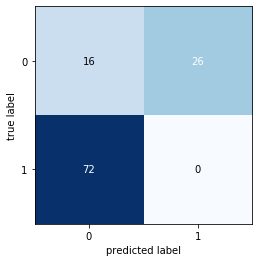

 **********  ROC for 30th randomly test_data *********


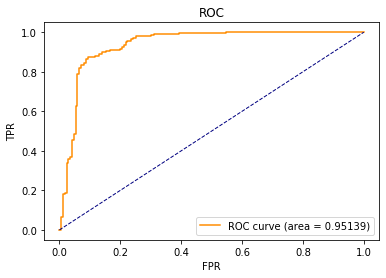

In [206]:
#-------------------------------------------------------------------------------
print("\n ********* for test data ********** ")
# print(acc_te)
print("accuracy_score: ", np.mean(acc_te))
print("precision_score: ", np.mean(prec_te))
print("recall_score:", np.mean(recall_te))
print("f1_score:", np.mean(f1_te))
print("auc_score:", np.mean(auc_te))

cm1 = confusion_matrix(y_test,y_test_pred)
print(cm1)
plot_confusion_matrix(cm1)
plt.show()

print(" **********  ROC for 30th randomly test_data *********")
test_fpr, test_tpr,_ = roc_curve(y_test, 
                                       pd.DataFrame(kmean.transform(X_test)).iloc[:,1],
                                      pos_label=1)
roc_auc = metrics.auc(test_fpr, test_tpr)
plt.figure()
plt.plot(train_fpr, train_tpr,color='darkorange',label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

###  iv Spectral Clustering:
Research: 
"Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them."
https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

In [207]:
def spe_report(pred,true,data,model):
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred, average='weighted')
    recall = recall_score(true, pred, average='weighted')
    f1 = f1_score(true, pred, average='weighted')
#     auc_ = roc_auc_score(true, pd.DataFrame(kmean.transform(data)).iloc[:,0])
    
    return (accuracy, precision, recall, f1, auc_)

 ******** for train data **********
accuracy_score:  0.6549987347608006
precision_score:  0.6616926527697562
recall_score: 0.6549987347608006
f1_score: 0.6115931399321679
auc_score: 0.7956902133570416
[[191  21]
 [ 24 333]]


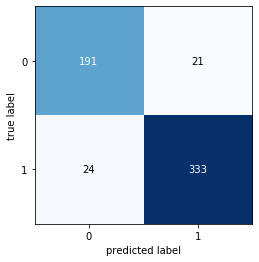

569
(569, 30)
 **********  ROC for 30th randomly data *********


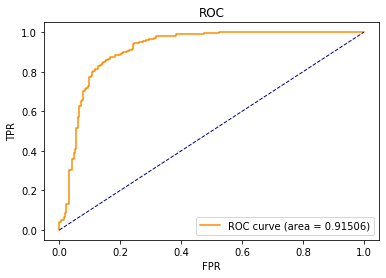

In [267]:
from sklearn.cluster import SpectralClustering
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

df = full_df.drop(columns="ID")
# 1 - Benign 0 - Malignant
df['Diagnosis'] = df['Diagnosis'].replace(['B'], '1')
df['Diagnosis'] = df['Diagnosis'].replace(['M'], '0')

X = df.iloc[:,1:]
y = df.iloc[:,0]


for i in range (0, 1):
    X_train,X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, 
                                                                                                stratify= y, random_state = 0)
    # ------------------Preprocessing the data----------------------------------
    # Scaling the train Data 
    '''
    https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
    '''
    
    scaler = StandardScaler() 
    X_scaled = scaler.fit_transform(X) 

    # Normalizing the Data 
    X_normalized = normalize(X_scaled) 
    
    # Converting the numpy array into a pandas DataFrame 
    X_normalized = pd.DataFrame(X_normalized) 
    
    pca = PCA(n_components = 2) 
    X_principal = pca.fit_transform(X_normalized) 
    X_principal = pd.DataFrame(X_principal) 
    X_principal.columns = ['P1', 'P2'] 

    X_test_sc = scaler.fit_transform(X_test)
    X_test_nor = normalize(X_test_sc)
    X_test_nor = pd.DataFrame(X_test_nor)
    X_test_nor = pca.fit_transform(X_test_nor) 
    X_test_nor = pd.DataFrame(X_test_nor) 
    X_test_nor.columns = ['P1', 'P2'] 
    
    #------------------------------------------------------------------------------
    spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf',gamma=1) 
    labels_rbf = spectral_model_rbf.fit_predict(X_principal) 
    
    #--------------------- report --------------------------------------------------
    y= list(map(int, y))
    labels_rbf = list(map(int, labels_rbf))
    acc, prec, recall, f1, auc = spe_report( labels_rbf,y, X_principal, spectral_model_rbf)
    acc_tr.append(acc)
    prec_tr.append(prec)
    recall_tr.append(recall)
    f1_tr.append(f1)
    
    fpr, tpr,_ = roc_curve(labels_rbf, 
                                       pd.DataFrame(kmean.transform(X_scaled)).iloc[:,1],
                                      pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    auc_tr.append(roc_auc)

    y_pred_test = spectral_model_rbf.fit_predict(X_test_nor) 
    y_pred_test = list(map(int, y_pred_test))
    y_test= list(map(int, y_test))
    acc1, prec1, recall1, f11, auc1 = spe_report( y_pred_test,y_test, X_test_nor, spectral_model_rbf)
    acc_te.append(acc1)
    prec_te.append(prec1)
    recall_te.append(recall1)
    f1_te.append(f11)
    
    fpr1, tpr1,_ = roc_curve(y_pred_test, 
                                       pd.DataFrame(kmean.transform(X_test_sc)).iloc[:,1],
                                      pos_label=1)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    auc_te.append(roc_auc1)
    
print(" ******** for train data **********")
print("accuracy_score: ", np.mean(acc_tr))
print("precision_score: ", np.mean(prec_tr))
print("recall_score:", np.mean(recall_tr))
print("f1_score:", np.mean(f1_tr))
print("auc_score:", np.mean(auc_tr))

cm = confusion_matrix(y,labels_rbf)
print(cm)
plot_confusion_matrix(cm)
plt.show()

print(len(y))
print(X_scaled.shape)
print(" **********  ROC for 30th randomly data *********")
fpr, tpr,_ = roc_curve(labels_rbf, 
                                       pd.DataFrame(kmean.transform(X_scaled)).iloc[:,1],
                                      pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


 ******** for test data **********
accuracy_score:  0.788676236044657
precision_score:  0.8364594165774901
recall_score: 0.788676236044657
f1_score: 0.8089140448926364
auc_score: 0.8622991650917564
[[ 4 38]
 [67  5]]


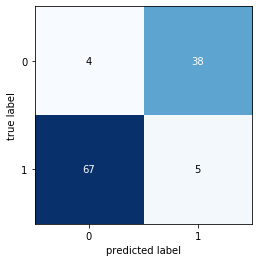

569
(569, 30)
 **********  ROC for 30th randomly data *********


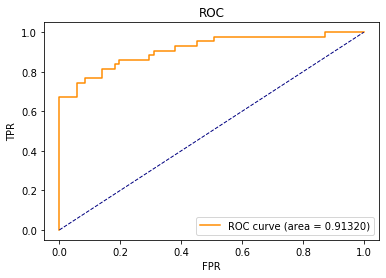

In [216]:
print(" ******** for test data **********")
print("accuracy_score: ", np.mean(acc_te))
print("precision_score: ", np.mean(prec_te))
print("recall_score:", np.mean(recall_te))
print("f1_score:", np.mean(f1_te))
print("auc_score:", np.mean(auc_te))

cm1 = confusion_matrix(y_test,y_pred_test)
print(cm1)
plot_confusion_matrix(cm1)
plt.show()

print(len(y))
print(X_scaled.shape)
print(" **********  ROC for 30th randomly data *********")
fpr, tpr,_ = roc_curve(y_pred_test, 
                                       pd.DataFrame(kmean.transform(X_test_sc)).iloc[:,1],
                                      pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### v. compare

|learning| score types| scoces|
|:---|-----|---:|
|supervised- training|accuracy_score|  0.9802197802197802
||precision_score|  0.9802061843481965
||recall_score| 0.9802197802197802
||f1_score| 0.9802079265371428
||auc_score| 0.9982999656002751
|supervised-testing| accuracy_score|  0.9649122807017542
||precision_score|  0.9649122807017542
||recall_score| 0.9649122807017542
||f1_score| 0.9649122807017542
||auc_score| 0.9963624338624338
|||
|semi-supervised--training|accuracy_score|  0.9893772893772894
||precision_score|  0.9894082413313185
||recall_score| 0.9893772893772894
||f1_score| 0.9893874275432168
||auc_score| 0.999409020684276
|semi-supervised--testing|accuracy_score|  0.9374269005847949
||precision_score|  0.9396016611577256
||recall_score| 0.9374269005847949
||f1_score| 0.9378400758560621
||auc_score| 0.9890432098765433
|||
|unsupervised kmeans_training |accuracy_score| 0.7435897435897438
||precision_score|  0.7496535618566563
||recall_score| 0.7435897435897438
||f1_score| 0.6869090213917801
||auc_score| 0.9259029927760579
|unsupervised kmeans_testing|accuracy_score|  0.8596491228070174
||precision_score|  0.9106858054226478
||recall_score| 0.8596491228070174
||f1_score| 0.8817051678971187
||auc_score|0.9139991181657849
|||
|Spectral Clustering_training|accuracy_score|  0.6480009676753735
||precision_score|  0.6548637841085202
||recall_score| 0.6480009676753735
||f1_score| 0.603450200042471
||auc_score| 0.7925489780738312
|Spectral Clustering_testing|accuracy_score|  0.788676236044657
||precision_score|  0.8364594165774901
||recall_score| 0.788676236044657
||f1_score| 0.8089140448926364
||auc_score| 0.8622991650917564

As the above, in the whole random data set, supervised learning seems the best, and the semi-supervised learning seems better than unsupervised, which is as the theory showing. 
Also, in unsupervised learning, in random data set, kmeans seems a litter better than Spectral Clustering. 

# 2. Active Learning Using Support Vector Machines
## a. randomly 472 test data +900 train data

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')


df_2 = pd.read_csv('D:/552 Machine Learning for Data Science/homework/Homework6/data_banknote_authentication.txt', header=None)
header_2 = ['VWT','SWT','CWT','EI','class']
df_2.columns = header_2
df_2.shape

# randomly
shuf_df= shuffle(df_2, random_state=0)
print(shuf_df.shape)

X = shuf_df.iloc[:,:-1]
y = shuf_df.iloc[:,-1]

X_train,X_test, y_train, y_test = train_test_split( X, y, test_size = 472, 
                                                                                                stratify= y, random_state = 0)
X_test.shape 

test_ = pd.concat([X_test,y_test],axis=1)
print(test_.shape)
train_ =pd.concat([X_train,y_train],axis=1)
print(train_.shape)

(1372, 5)
(472, 5)
(900, 5)


##  b Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure

### i passive learning

In [224]:
error_50 = []

passive_learning = dict()

# -------------------------------------------------------
for mc in range(1,51):
    print("\n****************     Monte-Carlo",mc,"   ****************")
    
    # --------------------preprocessing ---------------------
    tmp_i = df_2
    dataset=tmp_i.values

    shuf_ds= shuffle(dataset, random_state=0)
    print(shuf_ds.shape)

    X_test=shuf_ds[:472,:4]
    Y_test=shuf_ds[:472,4:]

    # rest is train data
    X_train_all=shuf_ds[472:,:4]
    Y_train_all=shuf_ds[472:,4:]
    #--------------------------------------------------------
    Best_c = []
    Best_score = []
    all_error_list=[]
    all_score_list = []
    time=[]

    all_errors=[]

    # ----------------------passive learning ---------------------------------
    for i in range(1,91):
        print("\n**********         ",i, "test        **********" )
        X_train=X_train_all[:10*i,:]
        Y_train=Y_train_all[:10*i,:]
        print("Now training pool: ",X_train.shape)

        # ------------------------- SVC with L1 -------------------------------------------
        C_range = np.logspace(-3, 6, num=10)
        tuned_parameters = dict(C=C_range)
        clf = GridSearchCV(LinearSVC(penalty='l1', dual=False), tuned_parameters, cv=5, refit=True, n_jobs=2)
        clf.fit(X_train, Y_train.ravel())

        print("Best C: ", clf.best_params_)
        Best_c.append(clf.best_params_)
        print("Best Score:", clf.best_score_)
        Best_score.append(clf.best_score_)

        # -------------  report ---------------------------------------
        preds=clf.predict(X_test)

        test_score=accuracy_score(Y_test, preds)
        all_score_list.append(test_score)

        test_error=1-test_score
        print("Test error:",test_error)
        all_error_list.append(test_error)
        
        #***********************
        
        #***********************
        
        all_errors=np.array(all_error_list)
        time.append(i)
    
    # ----------------------------------------------------------------
    passive_learning[mc] = all_error_list
#     tmp_er = np.mean(all_error_list)
    error_50.append(test_error)

print("\n")


****************     Monte-Carlo 1    ****************
(1372, 5)

**********          1 test        **********
Now training pool:  (10, 4)
Best C:  {'C': 10000.0}
Best Score: 1.0
Test error: 0.08898305084745761

**********          2 test        **********
Now training pool:  (20, 4)
Best C:  {'C': 1.0}
Best Score: 1.0
Test error: 0.0402542372881356

**********          3 test        **********
Now training pool:  (30, 4)
Best C:  {'C': 0.1}
Best Score: 0.9333333333333333
Test error: 0.06991525423728817

**********          4 test        **********
Now training pool:  (40, 4)
Best C:  {'C': 1.0}
Best Score: 0.975
Test error: 0.014830508474576232

**********          5 test        **********
Now training pool:  (50, 4)
Best C:  {'C': 1.0}
Best Score: 0.98
Test error: 0.014830508474576232

**********          6 test        **********
Now training pool:  (60, 4)
Best C:  {'C': 0.1}
Best Score: 0.9666666666666667
Test error: 0.029661016949152574

**********          7 test        ********

In [235]:
passive_learning = pd.DataFrame(passive_learning)
pass_error = passive_learning.T
pass_error

0         1         2         3         4         5         6   \
1   0.088983  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
2   0.082627  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
3   0.103814  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
4   0.258475  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
5   0.065678  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
6   0.237288  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
7   0.167373  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
8   0.091102  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
9   0.173729  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
10  0.110169  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
11  0.154661  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
12  0.097458  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
13  0.199153  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
14  0.194915  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
15  0.103814  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
16  0.165254  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
17  0.228814  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
18  0.243644  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
19  0.114407  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
20  0.074153  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
21  0.190678  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
22  0.252119  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
23  0.186441  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
24  0.148305  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
25  0.169492  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
26  0.203390  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
27  0.137712  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
28  0.201271  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
29  0.161017  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
30  0.116525  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
31  0.169492  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
32  0.093220  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
33  0.211864  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
34  0.228814  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
35  0.194915  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
36  0.188559  0.067797  0.069915  0.014831  0.014831  0.029661  0.014831   
37  0.184322  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
38  0.220339  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
39  0.201271  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
40  0.192797  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
41  0.213983  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
42  0.167373  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
43  0.226695  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
44  0.110169  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
45  0.122881  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
46  0.095339  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
47  0.201271  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   
48  0.131356  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
49  0.235169  0.040254  0.069915  0.014831  0.014831  0.029661  0.014831   
50  0.110169  0.057203  0.069915  0.014831  0.014831  0.029661  0.014831   

          7         8         9   ...        80        81        82        83  \
1   0.014831  0.014831  0.014831  ...  0.012712  0.0

In [252]:
passive = np.mean(pass_error)
passive

0     0.164449
1     0.043517
2     0.069915
3     0.014831
4     0.014831
5     0.029661
6     0.014831
7     0.014831
8     0.014831
9     0.014831
10    0.016949
11    0.016949
12    0.016949
13    0.016949
14    0.004237
15    0.021186
16    0.014831
17    0.023305
18    0.023305
19    0.023305
20    0.023305
21    0.014831
22    0.014831
23    0.014831
24    0.025424
25    0.021949
26    0.022076
27    0.022161
28    0.023644
29    0.025424
        ...   
60    0.019068
61    0.019068
62    0.019068
63    0.012712
64    0.012712
65    0.012712
66    0.012712
67    0.012712
68    0.012712
69    0.012712
70    0.012712
71    0.019068
72    0.012712
73    0.012712
74    0.012712
75    0.012712
76    0.012712
77    0.012712
78    0.012712
79    0.012712
80    0.012712
81    0.012712
82    0.012712
83    0.012712
84    0.012712
85    0.019068
86    0.012712
87    0.012712
88    0.019068
89    0.012712
Length: 90, dtype: float64

#### To be more observable, the table and the plot of the last time of Monte-Carlo simulation would be shown

In [179]:
# Test-errors for 90 SVMs- Passive Learning in 50th Monte-Carlo
time = range(1,91)
result = pd.DataFrame({"literation": time,
                                              "Best C": Best_c,
                                              "Best score": Best_score,
                                              "test error": all_error_list})
result

literation          Best C  Best score  test error
0            1   {'C': 1000.0}    1.000000    0.184322
1            2      {'C': 1.0}    1.000000    0.040254
2            3      {'C': 0.1}    0.933333    0.069915
3            4      {'C': 1.0}    0.975000    0.014831
4            5      {'C': 1.0}    0.980000    0.014831
5            6      {'C': 0.1}    0.966667    0.029661
6            7      {'C': 0.1}    0.985714    0.014831
7            8      {'C': 0.1}    0.987500    0.014831
8            9      {'C': 0.1}    0.988889    0.014831
9           10      {'C': 0.1}    0.990000    0.014831
10          11      {'C': 0.1}    0.981818    0.016949
11          12      {'C': 0.1}    0.983333    0.016949
12          13      {'C': 0.1}    0.984615    0.016949
13          14      {'C': 0.1}    0.978571    0.016949
14          15      {'C': 1.0}    0.986667    0.004237
15          16      {'C': 1.0}    0.975000    0.021186
16          17      {'C': 0.1}    0.970588    0.014831
17          18  {'C': 10000.0}    0.977778    0.023305
18          19    {'C': 100.0}    0.978947    0.023305
19          20      {'C': 1.0}    0.980000    0.023305
20          21      {'C': 1.0}    0.980952    0.023305
21          22      {'C': 0.1}    0.977273    0.014831
22          23      {'C': 0.1}    0.978261    0.014831
23          24      {'C': 0.1}    0.970833    0.014831
24          25      {'C': 1.0}    0.980000    0.025424
25          26     {'C': 10.0}    0.992308    0.023305
26          27     {'C': 10.0}    0.992593    0.021186
27          28     {'C': 10.0}    0.992857    0.021186
28          29     {'C': 10.0}    0.982759    0.023305
29          30     {'C': 10.0}    0.983333    0.025424
..         ...             ...         ...         ...
60          61      {'C': 1.0}    0.988525    0.019068
61          62      {'C': 1.0}    0.988710    0.019068
62          63      {'C': 1.0}    0.988889    0.019068
63          64      {'C': 0.1}    0.987500    0.012712
64          65      {'C': 0.1}    0.987692    0.012712
65          66      {'C': 0.1}    0.987879    0.012712
66          67      {'C': 0.1}    0.988060    0.012712
67          68      {'C': 0.1}    0.988235    0.012712
68          69      {'C': 0.1}    0.989855    0.012712
69          70      {'C': 0.1}    0.990000    0.012712
70          71      {'C': 0.1}    0.990141    0.012712
71          72      {'C': 1.0}    0.987500    0.019068
72          73      {'C': 0.1}    0.990411    0.012712
73          74      {'C': 0.1}    0.990541    0.012712
74          75      {'C': 0.1}    0.989333    0.012712
75          76      {'C': 0.1}    0.989474    0.012712
76          77      {'C': 0.1}    0.989610    0.012712
77          78      {'C': 0.1}    0.991026    0.012712
78          79      {'C': 0.1}    0.991139    0.012712
79          80      {'C': 0.1}    0.991250    0.012712
80          81      {'C': 0.1}    0.991358    0.012712
81          82      {'C': 0.1}    0.991463    0.012712
82          83      {'C': 0.1}    0.992771    0.012712
83          84      {'C': 0.1}    0.992857    0.012712
84          85      {'C': 0.1}    0.992941    0.012712
85          86     {'C': 10.0}    0.991860    0.019068
86          87      {'C': 0.1}    0.993103    0.012712
87          88      {'C': 0.1}    0.993182    0.012712
88          89     {'C': 10.0}    0.992135    0.019068
89          90      {'C': 1.0}    0.991111    0.012712

[90 rows x 4 columns]

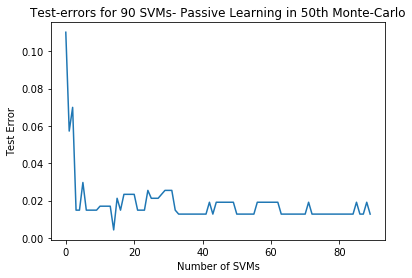

In [262]:
time = range(90)
plt.title('Test-errors for 90 SVMs- Passive Learning in 50th Monte-Carlo')
plt.xlabel('Number of SVMs')
plt.ylabel('Test Error')
plt.plot(time,all_errors)
plt.show()

### ii. active learning

In [236]:
active_learning=dict()
error_50_ = []

for mc in range(1,51):
    print("****************     Monte-Carlo",mc,"   ****************")
    
        # -------------------------preprocessing ----------------------------
    tmp_ii = df_2
    dataset=tmp_ii.values

    shuf_ds= shuffle(dataset, random_state=0)
    X_test=shuf_ds[:472,:4]
    Y_test=shuf_ds[:472,4:]

    X_train_all=shuf_ds[472:482,:4]
    Y_train_all=shuf_ds[472:482,4:]

    X_rest=shuf_ds[482:,:4]
    Y_rest=shuf_ds[482:,4:]

    # -----------------------------------------------------------------------
    Best_c_ = []
    Best_score_ = []

    all_error_list_ = []
    all_errors_ = []


    X_train = X_train_all[:,:]
    Y_train = Y_train_all[:,:]

    
    for i in range(1, 90):
        print("\n**********         ",i, " test        **********" )

        #  ----------------------------- SVM ------------------------------------------------------------
        C_range = np.logspace(-3, 6, num=10)
        tuned_parameters = dict(C=C_range)
        cross_val = StratifiedShuffleSplit(n_splits=5, random_state=0)
        clf_ = GridSearchCV(LinearSVC(penalty='l1', dual=False), 
                                            tuned_parameters, 
                                            cv=5, refit=True, n_jobs=2).fit(X_train, Y_train.ravel())

        scores = clf_.cv_results_['mean_test_score']
        scores_std = clf_.cv_results_['std_test_score']

        print("Best C: ", clf_.best_params_)
        Best_c_.append(clf_.best_params_)
        print("Best Score:", clf_.best_score_)
        Best_score_.append(clf_.best_score_)

        # ----------------------------------- report ----------------------------------
        preds_ = clf_.predict(X_test)
        test_score = accuracy_score(Y_test, preds_)

        test_error = 1 - test_score
        print("Test Error:", test_error)
        all_error_list_.append(test_error)
        all_errors_ = np.array(all_error_list)


        # ----------------------------------- closest -------------------------------
        X_margin = clf.decision_function(X_rest)
        X_margin = np.abs(X_margin)

        index_for = np.arange(0, len(X_margin), 1)

        data = {'index': index_for, 'Margin_dist': X_margin}
        df = pd.DataFrame(data)
        df = df.sort_values(by='Margin_dist')

        print("\n *** closest 10 points *** ")
        df_10=pd.DataFrame()
        df_10=df.iloc[:10]
        print(df_10)

        #---------------------  update -------------------------------
        '''
        https://thispointer.com/delete-elements-rows-or-columns-from-a-numpy-array-by-index-positions-using-numpy-delete-in-python/
        '''
        check_arr=X_train
        check_Y_arr=Y_train

        to_use_indices=[]
        temp_X=X_rest
        temp_Y=Y_rest

        for j in range(0,10):
            temp=np.int(df_10.values[j,1])
            to_use_indices.append(temp)
            check_arr=np.vstack((check_arr,np.array(X_rest[temp].reshape(1,4))))
            check_Y_arr = np.vstack((check_Y_arr, np.array(Y_rest[temp].reshape(1, 1))))

        temp_X = np.delete(temp_X, to_use_indices, axis=0)
        temp_Y = np.delete(temp_Y, to_use_indices, axis=0)

        #  ---------------------new X_train and Y_train -----------------------------
        X_train=check_arr
        Y_train=check_Y_arr

        Y_rest=temp_Y
        X_rest=temp_X

#     tmp_er = np.mean(all_error_list)
    error_50_.append(test_error)
    active_learning[mc] = all_error_list_
print("\n")

****************     Monte-Carlo 1    ****************

**********          1  test        **********
Best C:  {'C': 100000.0}
Best Score: 1.0
Test Error: 0.12076271186440679

 *** closest 10 points *** 
     index  Margin_dist
881    881     0.015318
7        7     0.025185
147    147     0.097724
148    148     0.133917
279    279     0.172627
222    222     0.183800
377    377     0.274922
733    733     0.320307
303    303     0.352192
120    120     0.352192

**********          2  test        **********
Best C:  {'C': 1.0}
Best Score: 1.0
Test Error: 0.18644067796610164

 *** closest 10 points *** 
     index  Margin_dist
880    880     0.015318
6        6     0.025185
146    146     0.097724
147    147     0.133917
278    278     0.172627
221    221     0.183800
376    376     0.274922
732    732     0.320307
119    119     0.352192
302    302     0.352192

**********          3  test        **********
Best C:  {'C': 10.0}
Best Score: 1.0
Test Error: 0.18432203389830504

 *** cl

In [250]:
active_learning = pd.DataFrame(active_learning)
active_error = active_learning.T
active_error

0         1         2         3         4         5         6   \
1   0.120763  0.186441  0.184322  0.165254  0.203390  0.031780  0.031780   
2   0.171610  0.088983  0.184322  0.152542  0.199153  0.120763  0.120763   
3   0.118644  0.184322  0.194915  0.173729  0.201271  0.120763  0.031780   
4   0.110169  0.186441  0.125000  0.139831  0.190678  0.120763  0.029661   
5   0.239407  0.184322  0.184322  0.213983  0.171610  0.033898  0.031780   
6   0.110169  0.186441  0.184322  0.118644  0.188559  0.120763  0.120763   
7   0.180085  0.186441  0.184322  0.222458  0.171610  0.120763  0.038136   
8   0.192797  0.184322  0.281780  0.122881  0.190678  0.120763  0.120763   
9   0.152542  0.184322  0.184322  0.182203  0.186441  0.120763  0.031780   
10  0.080508  0.186441  0.184322  0.184322  0.171610  0.033898  0.040254   
11  0.190678  0.184322  0.184322  0.169492  0.169492  0.120763  0.120763   
12  0.228814  0.186441  0.184322  0.059322  0.188559  0.120763  0.078390   
13  0.116525  0.186441  0.095339  0.163136  0.173729  0.120763  0.120763   
14  0.190678  0.186441  0.184322  0.175847  0.186441  0.120763  0.120763   
15  0.235169  0.186441  0.216102  0.099576  0.171610  0.040254  0.120763   
16  0.110169  0.186441  0.184322  0.093220  0.188559  0.120763  0.029661   
17  0.199153  0.186441  0.171610  0.211864  0.175847  0.120763  0.120763   
18  0.177966  0.184322  0.184322  0.156780  0.173729  0.120763  0.120763   
19  0.201271  0.184322  0.184322  0.091102  0.203390  0.120763  0.120763   
20  0.101695  0.186441  0.127119  0.086864  0.188559  0.120763  0.120763   
21  0.194915  0.186441  0.184322  0.182203  0.216102  0.120763  0.040254   
22  0.120763  0.186441  0.184322  0.177966  0.197034  0.120763  0.120763   
23  0.184322  0.186441  0.184322  0.233051  0.192797  0.120763  0.120763   
24  0.224576  0.184322  0.184322  0.093220  0.192797  0.120763  0.120763   
25  0.139831  0.186441  0.184322  0.114407  0.171610  0.031780  0.031780   
26  0.186441  0.186441  0.184322  0.171610  0.186441  0.031780  0.120763   
27  0.110169  0.211864  0.184322  0.095339  0.188559  0.120763  0.120763   
28  0.152542  0.186441  0.082627  0.116525  0.184322  0.040254  0.120763   
29  0.203390  0.184322  0.184322  0.131356  0.180085  0.120763  0.120763   
30  0.110169  0.186441  0.184322  0.055085  0.182203  0.120763  0.044492   
31  0.086864  0.186441  0.171610  0.233051  0.186441  0.120763  0.031780   
32  0.154661  0.186441  0.184322  0.110169  0.171610  0.120763  0.120763   
33  0.239407  0.186441  0.250000  0.131356  0.173729  0.120763  0.038136   
34  0.188559  0.186441  0.184322  0.146186  0.180085  0.120763  0.031780   
35  0.099576  0.097458  0.184322  0.091102  0.201271  0.120763  0.120763   
36  0.074153  0.186441  0.184322  0.112288  0.144068  0.038136  0.040254   
37  0.197034  0.186441  0.139831  0.213983  0.197034  0.120763  0.120763   
38  0.241525  0.186441  0.184322  0.131356  0.201271  0.031780  0.031780   
39  0.110169  0.184322  0.076271  0.108051  0.186441  0.120763  0.036017   
40  0.082627  0.186441  0.184322  0.216102  0.182203  0.120763  0.120763   
41  0.097458  0.186441  0.180085  0.190678  0.171610  0.120763  0.120763   
42  0.167373  0.186441  0.072034  0.184322  0.197034  0.120763  0.120763   
43  0.110169  0.199153  0.184322  0.169492  0.201271  0.120763  0.120763   
44  0.194915  0.186441  0.184322  0.052966  0.199153  0.042373  0.120763   
45  0.237288  0.186441  0.184322  0.129237  0.171610  0.120763  0.120763   
46  0.203390  0.184322  0.184322  0.243644  0.197034  0.120763  0.031780   
47  0.118644  0.184322  0.116525  0.163136  0.171610  0.120763  0.031780   
48  0.233051  0.186441  0.184322  0.163136  0.139831  0.120763  0.029661   
49  0.186441  0.186441  0.144068  0.173729  0.175847  0.120763  0.046610   
50  0.230932  0.184322  0.224576  0.127119  0.175847  0.120763  0.120763   

          7         8         9   ...        79        80        81        82  \
1   0.031780  0.065678  0.065678  ...  0.014831  0.0

In [249]:
active = np.mean(active_error)
active

0     0.162203
1     0.182924
2     0.175042
3     0.148898
4     0.184237
5     0.103729
6     0.083814
7     0.090254
8     0.061992
9     0.058475
10    0.053347
11    0.056653
12    0.038305
13    0.021186
14    0.021186
15    0.014831
16    0.014831
17    0.014831
18    0.097458
19    0.097458
20    0.014831
21    0.074153
22    0.074153
23    0.074153
24    0.014831
25    0.014831
26    0.014831
27    0.014831
28    0.014831
29    0.014831
        ...   
59    0.016949
60    0.016949
61    0.016949
62    0.014831
63    0.014831
64    0.016949
65    0.014831
66    0.014831
67    0.014831
68    0.014831
69    0.014831
70    0.014831
71    0.014831
72    0.014831
73    0.014831
74    0.014831
75    0.019576
76    0.014831
77    0.014831
78    0.014831
79    0.014831
80    0.014831
81    0.014831
82    0.016949
83    0.016949
84    0.016949
85    0.014831
86    0.014831
87    0.014831
88    0.014831
Length: 89, dtype: float64

In [182]:
#Test-errors for 90 SVMs- Active Learning in 50th Monte-Carlo
time = range(1,90)
result_ = pd.DataFrame({"literation": time,
                                              "Best C": Best_c_,
                                              "Best score": Best_score_,
                                              "test error": all_error_list_})
result_

literation          Best C  Best score  test error
0            1  {'C': 10000.0}    1.000000    0.254237
1            2     {'C': 10.0}    1.000000    0.184322
2            3     {'C': 10.0}    1.000000    0.184322
3            4   {'C': 1000.0}    1.000000    0.188559
4            5    {'C': 100.0}    1.000000    0.194915
5            6      {'C': 0.1}    0.983333    0.120763
6            7      {'C': 0.1}    0.985714    0.120763
7            8      {'C': 0.1}    0.987500    0.120763
8            9     {'C': 10.0}    1.000000    0.067797
9           10    {'C': 100.0}    1.000000    0.061441
10          11    {'C': 100.0}    0.909091    0.052966
11          12   {'C': 1000.0}    0.916667    0.042373
12          13      {'C': 0.1}    0.838462    0.038136
13          14      {'C': 0.1}    0.850000    0.021186
14          15      {'C': 0.1}    0.873333    0.021186
15          16      {'C': 1.0}    0.931250    0.014831
16          17      {'C': 1.0}    0.935294    0.014831
17          18      {'C': 1.0}    0.938889    0.014831
18          19     {'C': 0.01}    0.942105    0.097458
19          20     {'C': 0.01}    0.945000    0.097458
20          21      {'C': 0.1}    0.971429    0.014831
21          22     {'C': 0.01}    0.954545    0.074153
22          23     {'C': 0.01}    0.956522    0.074153
23          24     {'C': 0.01}    0.958333    0.074153
24          25      {'C': 0.1}    0.960000    0.014831
25          26      {'C': 0.1}    0.961538    0.014831
26          27      {'C': 0.1}    0.962963    0.014831
27          28      {'C': 0.1}    0.964286    0.014831
28          29      {'C': 0.1}    0.965517    0.014831
29          30      {'C': 0.1}    0.966667    0.014831
..         ...             ...         ...         ...
59          60      {'C': 0.1}    0.983333    0.016949
60          61      {'C': 0.1}    0.983607    0.016949
61          62      {'C': 0.1}    0.983871    0.016949
62          63     {'C': 0.01}    0.984127    0.014831
63          64     {'C': 0.01}    0.984375    0.014831
64          65     {'C': 0.01}    0.984615    0.016949
65          66     {'C': 0.01}    0.984848    0.014831
66          67     {'C': 0.01}    0.985075    0.014831
67          68     {'C': 0.01}    0.985294    0.014831
68          69     {'C': 0.01}    0.985507    0.014831
69          70     {'C': 0.01}    0.985714    0.014831
70          71     {'C': 0.01}    0.985915    0.014831
71          72     {'C': 0.01}    0.986111    0.014831
72          73     {'C': 0.01}    0.986301    0.014831
73          74     {'C': 0.01}    0.986486    0.014831
74          75     {'C': 0.01}    0.986667    0.014831
75          76      {'C': 1.0}    0.986842    0.016949
76          77      {'C': 0.1}    0.974026    0.014831
77          78      {'C': 0.1}    0.974359    0.014831
78          79      {'C': 0.1}    0.974684    0.014831
79          80      {'C': 0.1}    0.975000    0.014831
80          81      {'C': 0.1}    0.975309    0.014831
81          82     {'C': 0.01}    0.987805    0.014831
82          83     {'C': 0.01}    0.987952    0.016949
83          84     {'C': 0.01}    0.988095    0.016949
84          85     {'C': 0.01}    0.988235    0.016949
85          86     {'C': 0.01}    0.988372    0.014831
86          87     {'C': 0.01}    0.988506    0.014831
87          88     {'C': 0.01}    0.988636    0.014831
88          89     {'C': 0.01}    0.988764    0.014831

[89 rows x 4 columns]

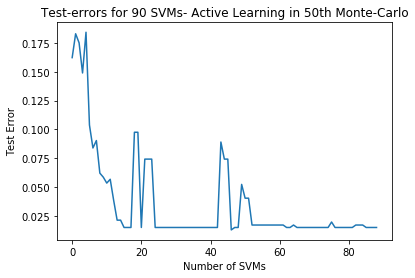

In [264]:
time = range(90)
plt.title('Test-errors for 90 SVMs- Active Learning in 50th Monte-Carlo')
plt.xlabel('Number of SVMs')
plt.ylabel('Test Error')
plt.plot(time,active)
plt.show()

### c. average test error versus number of training instances

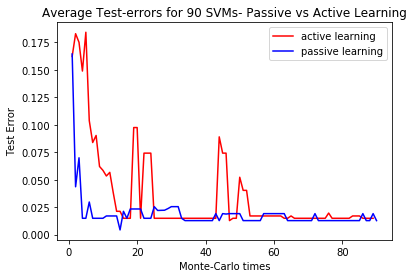

In [265]:
time = range(1,90)
time_ = range(1,91)
plt.title('Average Test-errors for 90 SVMs- Passive vs Active Learning')
plt.xlabel('Monte-Carlo times')
plt.ylabel('Test Error')
plt.plot(time, active,'r',label="active learning")
plt.plot(time_, passive,'b',label="passive learning")
plt.legend()

plt.show()

#### Report conclusion 

In random data set, for the average test-error 50-time of Monte-Carlo simulation,  as the above plot showing, for randomly adding 10 training points into training pool, the test errors look fluctuate greatly of both active and passive learning at the begining.

Then, with a bigger training pool, these two test-error rates as a whole is in a downward trend, and finally tends to be flat. 

Also, the final test-error of active learning seems a little better than the final test-error of passive learning. 


In [ ]:
# ------------------------------------ END ------------------------------------------